# Project 1

## 1. Part 1
### Importing Libraries and Setting Data Location

In [1554]:
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
import numpy as np

filename =  'https://raw.githubusercontent.com/mselmasry/DojoDataSets/main/sales_predictions.csv'

### Reading Data into DataFrame & Displaying head

In [1555]:
df = pd.read_csv(filename)

#Copying df to run SimpleImputer method and compare fill outcome
df_base = pd.read_csv(filename)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.01605,Dairy,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800
1,DRC01,5.92000,Regular,0.01928,Soft Drinks,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280
2,FDN15,17.50000,Low Fat,0.01676,Meat,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000
3,FDX07,19.20000,Regular,0.00000,Fruits and Vegetables,182.09500,OUT010,1998,NaN,Tier 3,Grocery Store,732.38000
4,NCD19,8.93000,Low Fat,0.00000,Household,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520


<p>Here is the Data Dictionary for this dataset:</p>

<table><tbody><tr><td><strong>Variable&nbsp;Name</strong></td><td><strong>Description</strong></td></tr><tr><td>Item_Identifier</td><td>Unique product ID</td></tr><tr><td>Item_Weight</td><td>Weight of product</td></tr><tr><td>Item_Fat_Content</td><td>Whether the product is low fat or regular</td></tr><tr><td>Item_Visibility</td><td>The percentage of total display area of all products in a store allocated to the particular product</td></tr><tr><td>Item_Type</td><td>The category to which the product belongs</td></tr><tr><td>Item_MRP</td><td>Maximum Retail Price (list price) of the product</td></tr><tr><td>Outlet_Identifier</td><td>Unique store ID</td></tr><tr><td>Outlet_Establishment_Year</td><td>The year in which store was established</td></tr><tr><td>Outlet_Size</td><td>The size of the store in terms of ground area covered</td></tr><tr><td>Outlet_Location_Type</td><td>The type of area in which the store is located</td></tr><tr><td>Outlet_Type</td><td>Whether the outlet is a grocery store or some sort of supermarket</td></tr><tr><td>Item_Outlet_Sales</td><td>Sales of the product in the particular store. This is the target variable to be predicted.
<a href="https://github.com/ShauryaBhandari/Bigmart-Sales-Prediction#why-does-the-the-problem-need-to-be-solved" id="user-content-why-does-the-the-problem-need-to-be-solved" class="anchor" aria-hidden="true" target="_blank"></a></td></tr></tbody></table>

## Part 2

### 1. How many rows and columns?

In [1556]:
print(df.shape)
print(f"Number of Rows is: {len(df)}")
print(f"Number of Columns is: {len(df.columns)}")

(8523, 12)
Number of Rows is: 8523
Number of Columns is: 12


In [1557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 2. What are the datatypes of each variable?

In [1558]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3. Are there duplicates? If so, drop any duplicates

In [1559]:
df.duplicated().any()

False

### 4. Identify missing values

#### Which Columns ?

In [1560]:
df.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

#### How many records ?

In [1561]:
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


#### Show Records with Null Values

In [1562]:
missingItemWeight = df[df['Item_Weight'].isna()]
missingOutletSize = df[df['Outlet_Size'].isna()]
print(f'Number of records missing Outlet_Size is: {len(missingOutletSize)}')
print(f'Number of records missing Item_Weight is: {len(missingItemWeight)}')

Number of records missing Outlet_Size is: 2410
Number of records missing Item_Weight is: 1463


In [1563]:
missingOutletSize

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20000,Regular,0.00000,Fruits and Vegetables,182.09500,OUT010,1998,NaN,Tier 3,Grocery Store,732.38000
8,FDH17,16.20000,Regular,0.01669,Frozen Foods,96.97260,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.59860
9,FDU28,19.20000,Regular,0.09445,Frozen Foods,187.82140,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.53500
25,NCD06,13.00000,Low Fat,0.09989,Household,45.90600,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.90800
28,FDE51,5.92500,Regular,0.16147,Dairy,45.50860,OUT010,1998,NaN,Tier 3,Grocery Store,178.43440
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.42000,Low Fat,0.07071,Household,216.41920,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.06880
8508,FDW31,11.35000,Regular,0.04325,Fruits and Vegetables,199.47420,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.96460
8509,FDG45,8.10000,Low Fat,0.21431,Fruits and Vegetables,213.99020,OUT010,1998,NaN,Tier 3,Grocery Store,424.78040
8514,FDA01,15.00000,Regular,0.05449,Canned,57.59040,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.72320


In [1564]:
missingItemWeight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.76220,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76360
18,DRI11,NaN,Low Fat,0.03424,Hard Drinks,113.28340,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.66800
21,FDW12,NaN,Regular,0.03540,Baking Goods,144.54440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.04320
23,FDC37,NaN,Low Fat,0.05756,Baking Goods,107.69380,OUT019,1985,Small,Tier 1,Grocery Store,214.38760
29,FDC14,NaN,Regular,0.07222,Canned,43.64540,OUT019,1985,Small,Tier 1,Grocery Store,125.83620
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.04379,Soft Drinks,189.05300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.84900
8487,DRG13,NaN,Low Fat,0.03701,Soft Drinks,164.75260,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.31500
8488,NCN14,NaN,Low Fat,0.09147,Others,184.66080,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.41200
8490,FDU44,NaN,Regular,0.10230,Fruits and Vegetables,162.35520,OUT019,1985,Small,Tier 1,Grocery Store,487.36560


### 5. Decide on how to address the missing values and do it! (explain your choice)

#### a. Outlet_Size Analysis & Correction

##### Checking if missing value can be inferred from other records

In [1565]:
df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type  Outlet_Type        Outlet_Size  Outlet_Identifier
Tier 1                Grocery Store      Small        OUT019               179694.09360
                      Supermarket Type1  Medium       OUT049              2183969.81020
                                         Small        OUT046              2118395.16820
Tier 2                Supermarket Type1  Small        OUT035              2268122.93540
Tier 3                Supermarket Type1  High         OUT013              2142663.57820
                      Supermarket Type2  Medium       OUT018              1851822.83000
                      Supermarket Type3  Medium       OUT027              3453926.05140
Name: Item_Outlet_Sales, dtype: float64

In [1566]:
df[df['Outlet_Size'].isna()].groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type  Outlet_Type        Outlet_Identifier
Tier 2                Supermarket Type1  OUT017              2167465.29400
                                         OUT045              2036725.47700
Tier 3                Grocery Store      OUT010               188340.17240
Name: Item_Outlet_Sales, dtype: float64

###### Filling values for Outlet_Size

In [1567]:
#Since all Outlets of Tier 2 & Outlet_Type Supermarket Type1 have an Outlet_Size of Small,
#Filling Outlet_Size values for OUT045 & OUT017 with inferred size Small
#Total Item_Outlet_Sales does not seem to be correlated to Outlet_Size alone for Tier 1
#For Tier 3 it seems related to Size and thus OUT010 could consequently be of size Medium


outletIDFilter1 = df['Outlet_Identifier'] == 'OUT045'
outletIDFilter2 = df['Outlet_Identifier'] == 'OUT017'
outletIDFilter3 = df['Outlet_Identifier'] == 'OUT010'
df.loc[outletIDFilter1 | outletIDFilter2, 'Outlet_Size'] = 'Small'
df.loc[outletIDFilter3,'Outlet_Size'] = 'Medium'

###### Verifying Outlet_Size for OUT017 & OUT045 are filled

In [1568]:
df['Outlet_Size'].isna().sum()
#Remaining Null Values in Outlet_Size is 0, no more Null values

0

In [1569]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### Testing Simple Imputer


In [1570]:
import sys
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_base)

filled_df = imputer.transform(df_base)
filled_df = pd.DataFrame(filled_df)
filled_df.columns = (['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'])
filled_df.head(10)
df_base['Outlet_Size'] = filled_df['Outlet_Size']
filled_df.groupby(['Outlet_Size','Outlet_Identifier'])['Outlet_Identifier'].count()

#Result of SimpleImputer using most_frequent strategy is different than inferred result
#SimpleImputer filled Size for all Outlet_Identifiers with Medium

#Will stick with Inferred values for Outlet_Size since SimpleImputer documentation
#mentions that the method does not take into consideration cross categorical corelations

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT010               555
             OUT017               926
             OUT018               928
             OUT027               935
             OUT045               929
             OUT049               930
Small        OUT019               528
             OUT035               930
             OUT046               930
Name: Outlet_Identifier, dtype: int64

In [1571]:
df_base.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### b. Item_Weight Analysis & Correction

##### Calculating mean weight per item type

In [1572]:
meanWeightPerType = df.groupby('Item_Type')['Item_Weight'].median()
meanWeightPerType = pd.DataFrame(meanWeightPerType.rename_axis('Item_Type').reset_index())
meanWeightPerType.columns=['Item_Type','Mean_Weight']

In [1573]:
#Validating the results match the count returned by .info() 
print(f"\n Number of records with Null Item_Weight: {len(missingItemWeight)}")


 Number of records with Null Item_Weight: 1463


##### Calculating total & null counts per item type and percentage missing

In [1574]:
countByType = pd.DataFrame(df[['Item_Type']].value_counts().rename_axis('Item_Type').reset_index(name='Count'))

naFilter = df['Item_Weight'].isna()

onlyNa = df[naFilter]
onlyNaCount = pd.DataFrame(onlyNa[['Item_Type']].value_counts().rename_axis('Item_Type').reset_index(name='Count'))
onlyNaCount

itemTypeData = pd.concat([countByType, onlyNaCount['Count'], meanWeightPerType['Mean_Weight']],axis=1)
itemTypeData.columns=['Item_Type','Total_Count','Count_Missing','Mean_Weight']

itemTypeData['Percent_Missing'] = itemTypeData['Count_Missing']/itemTypeData['Total_Count'] * 100
itemTypeData

,Item_Type,Total_Count,Count_Missing,Mean_Weight,Percent_Missing
0,Fruits and Vegetables,1232,213,11.65000,17.28896
1,Snack Foods,1200,212,10.60000,17.66667
2,Household,910,151,10.69500,16.59341
3,Frozen Foods,856,138,12.15000,16.12150
4,Dairy,682,116,13.35000,17.00880
5,Canned,649,112,12.85000,17.25732
6,Baking Goods,648,110,13.10000,16.97531
7,Health and Hygiene,520,90,10.10000,17.30769
8,Soft Drinks,445,88,12.15000,19.77528
9,Meat,425,71,13.15000,16.70588


##### Summary Data for Item_Type Snack Foods

In [1575]:
oneTypeSummary = df[df['Item_Type']=='Household']
oneTypeSummary.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,759.00000,910.00000,910.00000,910.00000,910.00000
mean,13.38474,0.06132,149.42475,1997.78462,2258.78430
std,4.99884,0.05209,62.39401,8.29753,1692.24576
min,5.03000,0.00000,32.45580,1985.00000,33.29000
25%,8.69500,0.02472,107.76220,1987.00000,853.38915
50%,13.15000,0.04500,153.31820,1999.00000,1981.42080
75%,18.35000,0.09056,191.59975,2004.00000,3236.78670
max,21.25000,0.32578,264.79100,2009.00000,13086.96480


##### Using SimpleImputer to fill Item_Weight Null values using most_frequent strategy

In [1576]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_base)

filled_df = imputer.transform(df_base)
filled_df = pd.DataFrame(filled_df)
filled_df.columns = (['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'])

df_base['Item_Weight'] = filled_df['Item_Weight']
df_base['Item_Weight'].isna().sum()

0

In [1577]:
#Copying Item_Weight to main DataFrame (df) from Testing DataFrame (df_base)
#Since data observation and analysis did not yield any better results
df['Item_Weight'] = df_base['Item_Weight']

### 6. Confirm that there are no missing values after addressing them

In [1578]:
df.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

### 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

#### Check and Fix Item_Fat_Conetnets field

In [1579]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [1580]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Checking Outlet_Location_Type, Outlet_Type, Outlet_Establishment_Year

In [1581]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [1582]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [1583]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

### 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [1584]:
df2 = df
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.00000,8523.00000,8523.00000
mean,0.06613,140.99278,1997.83187,2181.28891
std,0.05160,62.27507,8.37176,1706.49962
min,0.00000,31.29000,1985.00000,33.29000
25%,0.02699,93.82650,1987.00000,834.24740
50%,0.05393,143.01280,1999.00000,1794.33100
75%,0.09459,185.64370,2004.00000,3101.29640
max,0.32839,266.88840,2009.00000,13086.96480


## 3. Part 3

In [1585]:
#Imports

import seaborn as sns
import matplotlib.pyplot as plt

### Correlation Heatmap

<AxesSubplot:>

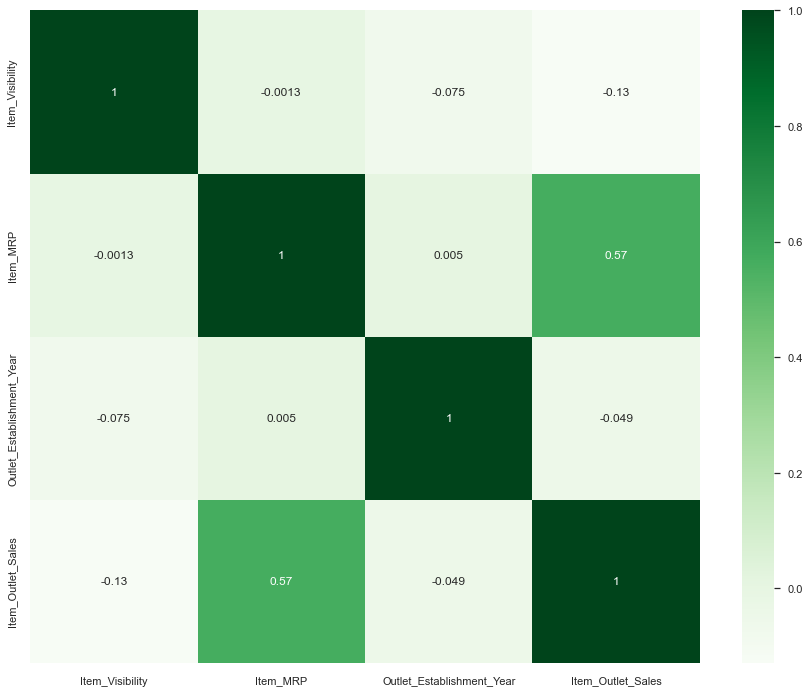

In [1586]:
corr = df.corr()
sns.heatmap(corr, cmap='Greens', annot=True)

### Histograms

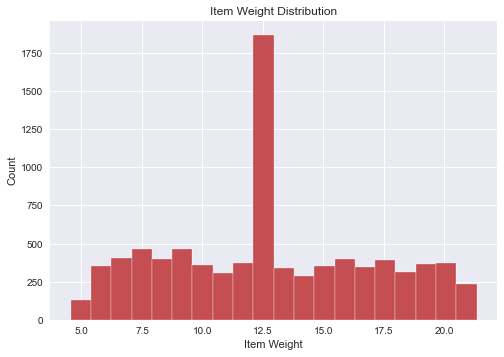

In [1587]:
plt.style.use('seaborn')
plt.title("Item Weight Distribution")
plt.ylabel('Count')
plt.xlabel('Item Weight')
df['Item_Weight'].hist(bins=20,color='r', edgecolor='white');

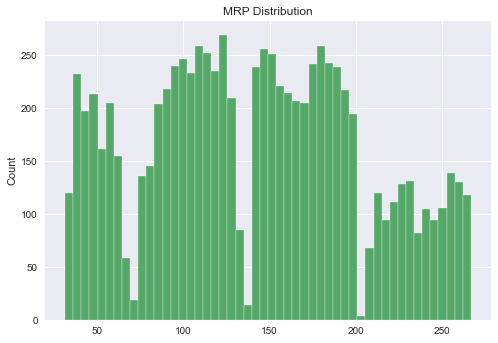

In [1588]:
plt.style.use('seaborn')
plt.title("MRP Distribution")
plt.ylabel('Count')
df['Item_MRP'].hist(bins=50,color='g',edgecolor='white');

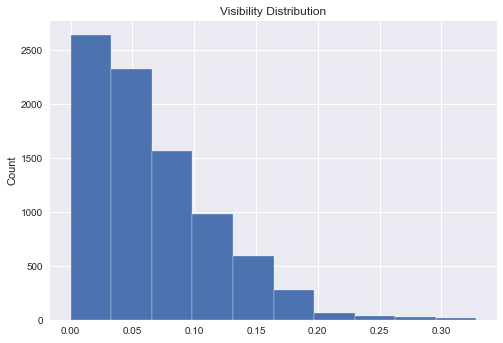

In [1589]:
plt.style.use('seaborn')
plt.title("Visibility Distribution")
plt.ylabel('Count')
df['Item_Visibility'].hist(bins=10,color='b',edgecolor='white');

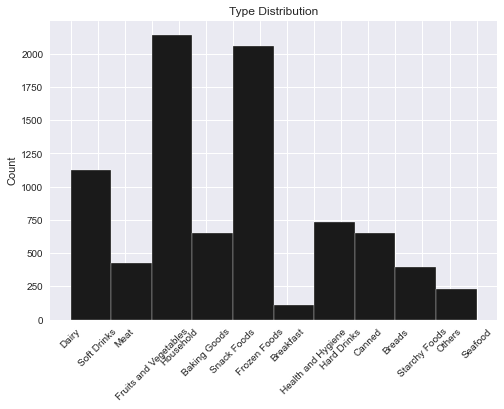

In [1590]:
plt.style.use('seaborn')
plt.title("Type Distribution")
plt.ylabel('Count')
plt.xticks(rotation=45)
df['Item_Type'].hist(color='k',edgecolor='white');

### Boxplots

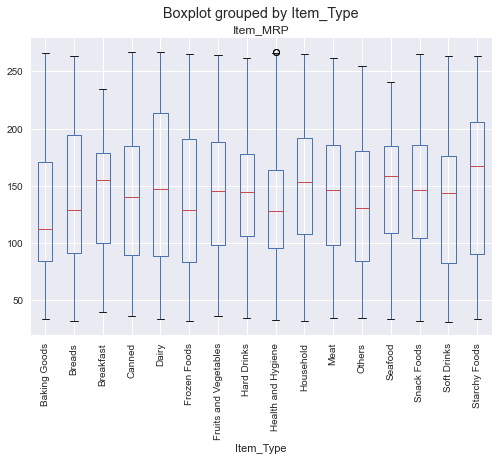

In [1591]:
df.boxplot(column='Item_MRP', by='Item_Type',rot=90);

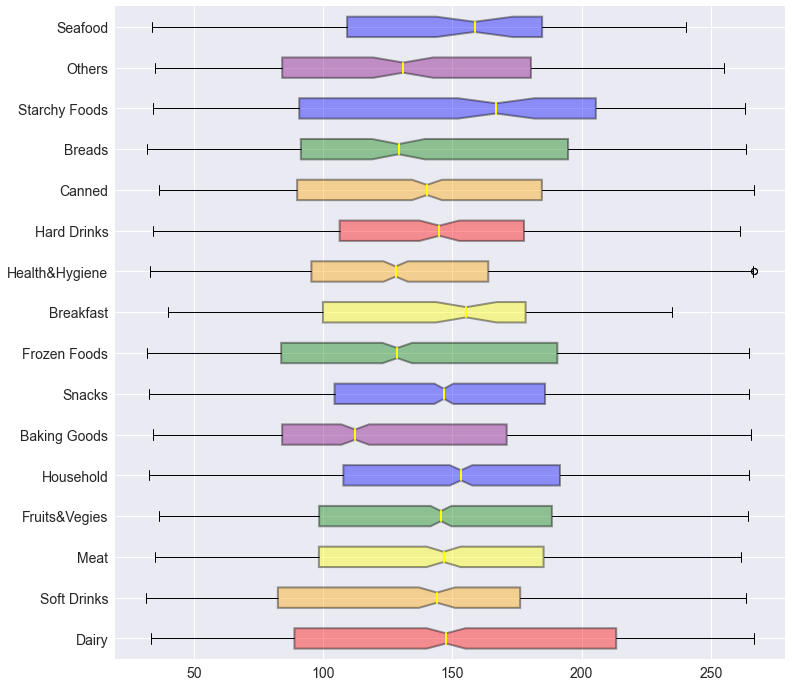

In [1592]:
#Item MRP by Types Summaries
dairyMRP = df.loc[df['Item_Type'] == 'Dairy','Item_MRP']
softDrinksMRP = df.loc[df['Item_Type'] == 'Soft Drinks','Item_MRP']
meatMRP = df.loc[df['Item_Type'] == 'Meat','Item_MRP']
fruitsVegMRP = df.loc[df['Item_Type'] == 'Fruits and Vegetables','Item_MRP']
householdMRP = df.loc[df['Item_Type'] == 'Household','Item_MRP']
bakingGoodsMRP = df.loc[df['Item_Type'] == 'Baking Goods','Item_MRP']
snackMRP = df.loc[df['Item_Type'] == 'Snack Foods','Item_MRP']
frozenMRP = df.loc[df['Item_Type'] == 'Frozen Foods','Item_MRP']
breakfastMRP = df.loc[df['Item_Type'] == 'Breakfast','Item_MRP']
HnHMRP = df.loc[df['Item_Type'] == 'Health and Hygiene','Item_MRP']
hardDrinksMRP = df.loc[df['Item_Type'] == 'Hard Drinks','Item_MRP']
cannedMRP = df.loc[df['Item_Type'] == 'Canned','Item_MRP']
breadsMRP = df.loc[df['Item_Type'] == 'Breads','Item_MRP']
starchyMRP = df.loc[df['Item_Type'] == 'Starchy Foods','Item_MRP']
othersMRP = df.loc[df['Item_Type'] == 'Others','Item_MRP']
seafoodMRP = df.loc[df['Item_Type'] == 'Seafood','Item_MRP']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,12));
boxplots = axes.boxplot([dairyMRP,softDrinksMRP,meatMRP,fruitsVegMRP,
              householdMRP,bakingGoodsMRP,snackMRP,frozenMRP,
              breakfastMRP,HnHMRP,hardDrinksMRP,cannedMRP,breadsMRP,
              starchyMRP,othersMRP,seafoodMRP], 
              notch = True, labels = ['Dairy','Soft Drinks','Meat',
              'Fruits&Vegies','Household','Baking Goods','Snacks','Frozen Foods',
              'Breakfast','Health&Hygiene','Hard Drinks','Canned','Breads',
              'Starchy Foods','Others','Seafood'], patch_artist=True,
              medianprops = dict(linestyle ='-', linewidth=2,color='Yellow'),
              boxprops=dict(linestyle='--',linewidth=2,color='Black',facecolor='blue',alpha=.4), vert=False);
#plt.xticks(rotation=45);
dairyplot = boxplots['boxes'][0];
dairyplot.set_facecolor('red');
softDrinksPlot = boxplots['boxes'][1];
softDrinksPlot.set_facecolor('orange');
meatPlot = boxplots['boxes'][2];
meatPlot.set_facecolor('Yellow');
fruitsVegPlot = boxplots['boxes'][3];
fruitsVegPlot.set_facecolor('green');
bakingGoodsPlot = boxplots['boxes'][4];
bakingGoodsPlot.set_facecolor('blue');
snacksPlot = boxplots['boxes'][5];
snacksPlot.set_facecolor('purple');
frozenPlot = boxplots['boxes'][6];
frozenPlot.set_facecolor('blue');
breakfastPlot = boxplots['boxes'][7];
breakfastPlot.set_facecolor('green');
HnHPlot = boxplots['boxes'][8];
HnHPlot.set_facecolor('Yellow');
hardDrinksPlot = boxplots['boxes'][9];
hardDrinksPlot.set_facecolor('orange');
cannedPlot = boxplots['boxes'][10];
cannedPlot.set_facecolor('red');
breadsPlot = boxplots['boxes'][11];
breadsPlot.set_facecolor('orange');
starchyPlot = boxplots['boxes'][12];
starchyPlot.set_facecolor('green');
otherPlot = boxplots['boxes'][13];
otherPlot.set_facecolor('blue');
seafoodPlot = boxplots['boxes'][14];
seafoodPlot.set_facecolor('purple');
plt.style.use('seaborn');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

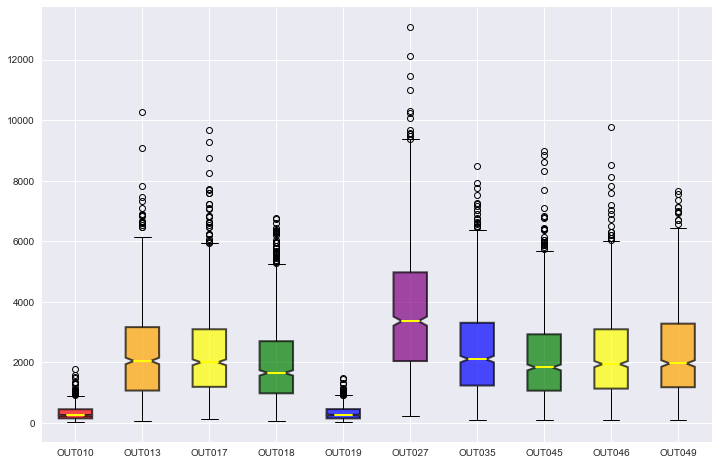

In [1593]:
#Total Sales by Outlet Summaries
out010 = df.loc[df['Outlet_Identifier']=='OUT010','Item_Outlet_Sales']
out013 = df.loc[df['Outlet_Identifier']=='OUT013','Item_Outlet_Sales']
out017 = df.loc[df['Outlet_Identifier']=='OUT017','Item_Outlet_Sales']
out018 = df.loc[df['Outlet_Identifier']=='OUT018','Item_Outlet_Sales']
out019 = df.loc[df['Outlet_Identifier']=='OUT019','Item_Outlet_Sales']
out027 = df.loc[df['Outlet_Identifier']=='OUT027','Item_Outlet_Sales']
out035 = df.loc[df['Outlet_Identifier']=='OUT035','Item_Outlet_Sales']
out045 = df.loc[df['Outlet_Identifier']=='OUT045','Item_Outlet_Sales']
out046 = df.loc[df['Outlet_Identifier']=='OUT046','Item_Outlet_Sales']
out049 = df.loc[df['Outlet_Identifier']=='OUT049','Item_Outlet_Sales']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,8))
boxplots = axes.boxplot([out010,out013,out017,out018,out019,out027,out035,out045,out046,out049], 
              notch = True, labels = ['OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049'], patch_artist=True,
              medianprops = dict(linestyle ='-', linewidth=2,color='Yellow'),
              boxprops=dict(linestyle='--',linewidth=2,color='Black',facecolor='blue',alpha=.7));
#plt.xticks(rotation=45);
dairyplot = boxplots['boxes'][0]
dairyplot.set_facecolor('red')
softDrinksPlot = boxplots['boxes'][1]
softDrinksPlot.set_facecolor('orange')
meatPlot = boxplots['boxes'][2]
meatPlot.set_facecolor('Yellow')
fruitsVegPlot = boxplots['boxes'][3]
fruitsVegPlot.set_facecolor('green')
bakingGoodsPlot = boxplots['boxes'][4]
bakingGoodsPlot.set_facecolor('blue')
snacksPlot = boxplots['boxes'][5]
snacksPlot.set_facecolor('purple')
frozenPlot = boxplots['boxes'][6]
frozenPlot.set_facecolor('blue')
breakfastPlot = boxplots['boxes'][7]
breakfastPlot.set_facecolor('green')
HnHPlot = boxplots['boxes'][8]
HnHPlot.set_facecolor('Yellow')
hardDrinksPlot = boxplots['boxes'][9]
hardDrinksPlot.set_facecolor('orange');


## 4. Part 4

In [1594]:
pd.options.display.float_format = '{:.5f}'.format
outletTotalSales = df[['Item_Outlet_Sales']].groupby([df['Outlet_Identifier']]).sum()
outletTotalSales.sort_values(by='Item_Outlet_Sales',inplace=True)

In [1595]:
totalSalesByType = df.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum().reset_index()
totalSalesByType.sort_values(by='Item_Outlet_Sales',inplace=True,ascending=False)

In [1596]:
avgMRPByType = df.groupby(df['Item_Type'])['Item_MRP'].mean().reset_index(name='Avg_MRP')
avgMRPByType.sort_values(by='Item_Type',inplace=True,ascending=False)

In [1597]:
noOutletID = df.drop(columns='Outlet_Identifier')
countByType = noOutletID.groupby(noOutletID['Item_Type'])['Item_MRP'].nunique().reset_index(name='Item_Count')
countByType.sort_values(by='Item_Count',inplace=True,ascending=False);

### Item Types that have higher Counts (more variety and options) have higher sales


 Item Types that have higher Counts (more variety and options) have higher sales.



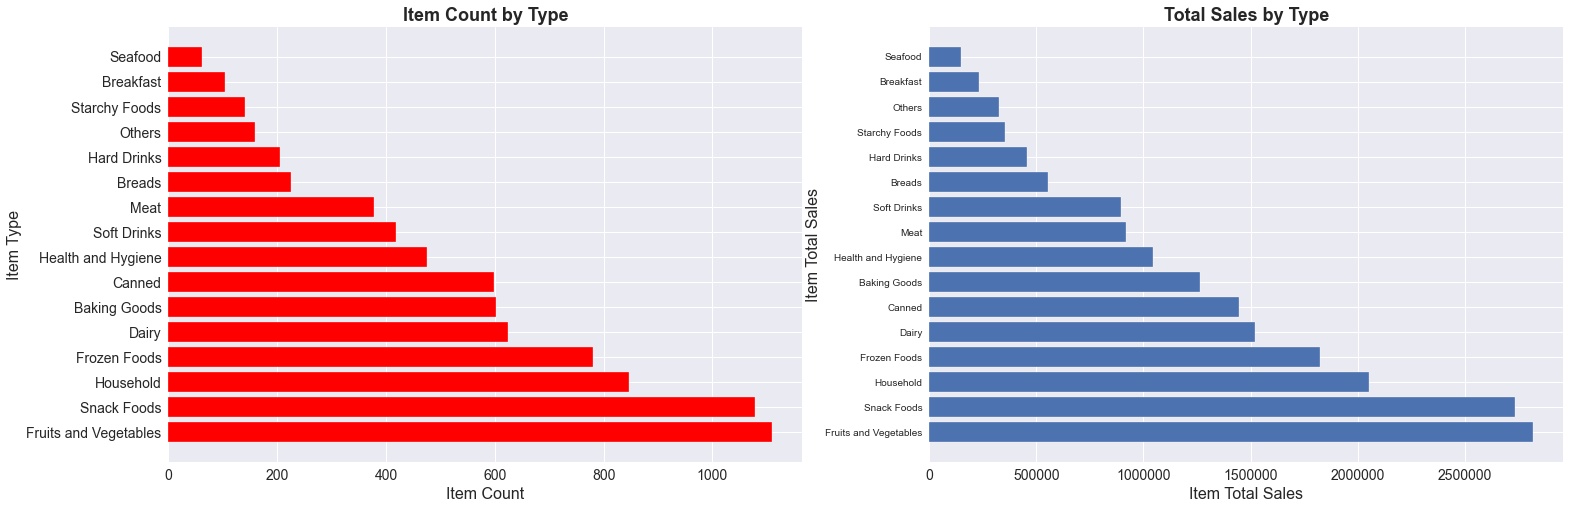

In [1598]:
# Count & Total Sales per Item Type
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.barh(countByType['Item_Type'],countByType['Item_Count'],color='red')
plt.xlabel('Item Count',fontsize=16)
plt.ylabel('Item Type',fontsize=16)
plt.title('Item Count by Type',fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
plt.barh(totalSalesByType['Item_Type'],totalSalesByType['Item_Outlet_Sales'])
plt.xlabel('Item Total Sales',fontsize=16)
plt.xticks(fontsize=14)
plt.ticklabel_format(style='plain',axis='x')
plt.xticks(fontsize=14)
plt.ylabel('Item Total Sales',fontsize=16)
plt.title('Total Sales by Type',fontsize=18,fontweight='bold')

print('\n Item Types that have higher Counts (more variety and options) have higher sales.\n')
plt.show()

### Total Sales of Small Outlets is Higher that Total Sales for High & Medium Size Outlets

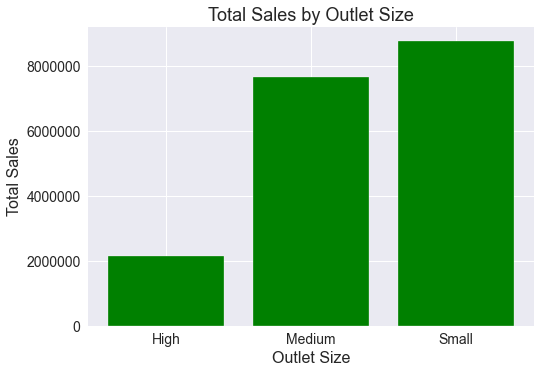

In [1599]:
salesBySize = df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum().reset_index()
salesBySize.sort_values('Item_Outlet_Sales')
plt.bar(salesBySize['Outlet_Size'],salesBySize['Item_Outlet_Sales'], color='green')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Outlet Size' , fontsize = 16);
plt.ylabel('Total Sales' , fontsize = 16);
plt.title('Total Sales by Outlet Size', fontsize=18);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

   Outlet_Establishment_Year Outlet_Size  Item_Outlet_Sales
0                       1985      Medium      3453926.05140
1                       1985       Small       179694.09360
2                       1987        High      2142663.57820
3                       1997       Small      2118395.16820
4                       1998      Medium       188340.17240
5                       1999      Medium      2183969.81020
6                       2002       Small      2036725.47700
7                       2004       Small      2268122.93540
8                       2007       Small      2167465.29400
9                       2009      Medium      1851822.83000



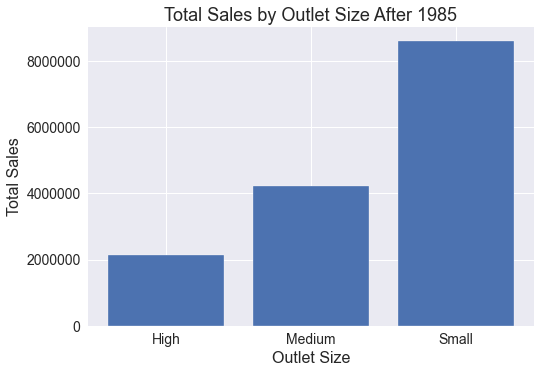

In [1600]:
#Total Sales By Outlet Establishment Year
salesByEstYear = df.groupby(['Outlet_Establishment_Year','Outlet_Size'])['Item_Outlet_Sales'].sum().reset_index()
print(salesByEstYear)
print()

#Since year 85 has a very high sales value that could skew the results
#Excluding it to compare Sales per Outlet Type

estYearFilter = salesByEstYear['Outlet_Establishment_Year'] > 1985
salesByEstYear = salesByEstYear.loc[estYearFilter,:];
salesByEstYearAfter85 = salesByEstYear.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index();
plt.bar(salesByEstYearAfter85['Outlet_Size'],salesByEstYearAfter85['Item_Outlet_Sales']);
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Outlet Size' , fontsize = 16);
plt.ylabel('Total Sales' , fontsize = 16);
plt.title('Total Sales by Outlet Size After 1985', fontsize=18);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

## 5. Part 5
Leaniar Regression
Target: Item_Outlet_Sales

<p>Here is the Data Dictionary for this dataset:</p>

<table>
<tbody>
<tr><td>
<strong>Variable&nbsp;Name</strong>
</td>
<td>
<strong>Description</strong>
</td></tr>
<tr><td>Item_Identifier</td>
<td>Unique product ID</td></tr>
<tr><td>Item_Weight</td>
<td>Weight of product</td></tr>
<tr><td>Item_Fat_Content</td>
<td>Whether the product is low fat or regular</td></tr>
<tr><td>Item_Visibility</td>
<td>The percentage of total display area of all products in a store allocated to the particular product</td></tr>
<tr><td>Item_Type</td>
<td>The category to which the product belongs</td></tr>
<tr><td>Item_MRP</td>
<td>Maximum Retail Price (list price) of the product</td></tr>
<tr><td>Outlet_Identifier</td>
<td>Unique store ID</td></tr>
<tr><td>Outlet_Establishment_Year</td>
<td>The year in which store was established</td></tr>
<tr><td>Outlet_Size</td>
<td>The size of the store in terms of ground area covered</td></tr>
<tr><td>Outlet_Location_Type</td>
<td>The type of area in which the store is located</td></tr>
<tr><td>Outlet_Type</td>
<td>Whether the outlet is a grocery store or some sort of supermarket</td></tr>
<tr><td>Item_Outlet_Sales</td>
<td>Sales of the product in the particular store. This is the target variable to be predicted.
<a href="https://github.com/ShauryaBhandari/Bigmart-Sales-Prediction#why-does-the-the-problem-need-to-be-solved" id="user-content-why-does-the-the-problem-need-to-be-solved" class="anchor" aria-hidden="true" target="_blank">
</a>
</td></tr></tbody></table>

In [1601]:
#ML Imports
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor

In [1602]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.01605,Dairy,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800
1,DRC01,5.92000,Regular,0.01928,Soft Drinks,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280
2,FDN15,17.50000,Low Fat,0.01676,Meat,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000
3,FDX07,19.20000,Regular,0.00000,Fruits and Vegetables,182.09500,OUT010,1998,Medium,Tier 3,Grocery Store,732.38000
4,NCD19,8.93000,Low Fat,0.00000,Household,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520


#### Processing Data for ML

Need to process 
1. Item_Fat_Content
2. Item_Type
3. Outlet_Identifier
4. Outlet_Size
5. Outlet_Location_Type
6. Outlet_Type

##### Item_Fat_Content (Get Dummies)

In [1603]:
ML_df = pd.get_dummies(df,columns=['Item_Fat_Content'], drop_first=True)
#Regular: 1, Low Fat: 0

##### Item_Type (Dict Map)

In [1604]:
itemTypes = ML_df['Item_Type'].value_counts().reset_index(name='Type_Count')

In [1605]:
itemTypes.columns = ['Item_Type','Type_Count']
itemTypes = itemTypes[['Item_Type']]
itemTypes

,Item_Type
0,Fruits and Vegetables
1,Snack Foods
2,Household
3,Frozen Foods
4,Dairy
5,Canned
6,Baking Goods
7,Health and Hygiene
8,Soft Drinks
9,Meat


In [1606]:
Item_Type_Dict = {
    itemTypes['Item_Type'][0] : 0,
    itemTypes['Item_Type'][1] : 1,
    itemTypes['Item_Type'][2] : 2,
    itemTypes['Item_Type'][3] : 3,
    itemTypes['Item_Type'][4] : 4,
    itemTypes['Item_Type'][5] : 5,
    itemTypes['Item_Type'][6] : 6,
    itemTypes['Item_Type'][7] : 7,
    itemTypes['Item_Type'][8] : 8,
    itemTypes['Item_Type'][9] : 9,
    itemTypes['Item_Type'][10] : 10,
    itemTypes['Item_Type'][11] : 11,
    itemTypes['Item_Type'][12] : 12,
    itemTypes['Item_Type'][13] : 13,
    itemTypes['Item_Type'][14] : 14,
    itemTypes['Item_Type'][15] : 15
}

ML_df['Item_Type'] = ML_df['Item_Type'].map(Item_Type_Dict)
ML_df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular
0,FDA15,9.30000,0.01605,4,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800,0
1,DRC01,5.92000,0.01928,8,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280,1
2,FDN15,17.50000,0.01676,9,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000,0
3,FDX07,19.20000,0.00000,0,182.09500,OUT010,1998,Medium,Tier 3,Grocery Store,732.38000,1
4,NCD19,8.93000,0.00000,2,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.86500,0.05678,1,214.52180,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38340,0
8519,FDS36,8.38000,0.04698,6,108.15700,OUT045,2002,Small,Tier 2,Supermarket Type1,549.28500,1
8520,NCJ29,10.60000,0.03519,7,85.12240,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11360,0
8521,FDN46,7.21000,0.14522,1,103.13320,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.59760,1


##### Outlet_Identifier (Dict Map)

In [1607]:
outlets = ML_df['Outlet_Identifier'].value_counts().reset_index(name='Record_Count')
outlets.columns = ['Outlet_Identifier','Record_Count']
outlets = outlets[['Outlet_Identifier']]
outlets

,Outlet_Identifier
0,OUT027
1,OUT013
2,OUT049
3,OUT046
4,OUT035
5,OUT045
6,OUT018
7,OUT017
8,OUT010
9,OUT019


In [1608]:
outletsDict = {
    outlets['Outlet_Identifier'][0] : 0,
    outlets['Outlet_Identifier'][1] : 1,
    outlets['Outlet_Identifier'][2] : 2,
    outlets['Outlet_Identifier'][3] : 3,
    outlets['Outlet_Identifier'][4] : 4,
    outlets['Outlet_Identifier'][5] : 5,
    outlets['Outlet_Identifier'][6] : 6,
    outlets['Outlet_Identifier'][7] : 7,
    outlets['Outlet_Identifier'][8] : 8,
    outlets['Outlet_Identifier'][9] : 9
}

ML_df['Outlet_Identifier'] = ML_df['Outlet_Identifier'].map(outletsDict)
ML_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular
0,FDA15,9.30000,0.01605,4,249.80920,2,1999,Medium,Tier 1,Supermarket Type1,3735.13800,0
1,DRC01,5.92000,0.01928,8,48.26920,6,2009,Medium,Tier 3,Supermarket Type2,443.42280,1
2,FDN15,17.50000,0.01676,9,141.61800,2,1999,Medium,Tier 1,Supermarket Type1,2097.27000,0
3,FDX07,19.20000,0.00000,0,182.09500,8,1998,Medium,Tier 3,Grocery Store,732.38000,1
4,NCD19,8.93000,0.00000,2,53.86140,1,1987,High,Tier 3,Supermarket Type1,994.70520,0


##### Outlet_Size (Get Dummies)

In [1609]:
ML_df = pd.get_dummies(ML_df,columns=['Outlet_Size'],drop_first=True)
ML_df.head()
#Medium: 1 0
#Small: 0 1
#High: 0 0

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small
0,FDA15,9.30000,0.01605,4,249.80920,2,1999,Tier 1,Supermarket Type1,3735.13800,0,1,0
1,DRC01,5.92000,0.01928,8,48.26920,6,2009,Tier 3,Supermarket Type2,443.42280,1,1,0
2,FDN15,17.50000,0.01676,9,141.61800,2,1999,Tier 1,Supermarket Type1,2097.27000,0,1,0
3,FDX07,19.20000,0.00000,0,182.09500,8,1998,Tier 3,Grocery Store,732.38000,1,1,0
4,NCD19,8.93000,0.00000,2,53.86140,1,1987,Tier 3,Supermarket Type1,994.70520,0,0,0


##### Outlet_Location_Type (Get Dummies)

In [1610]:
ML_df = pd.get_dummies(ML_df,columns=['Outlet_Location_Type'],drop_first=True)
ML_df
#Tier1 : 0 0
#Tier2 : 0 1
#Tier3 : 1 0

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30000,0.01605,4,249.80920,2,1999,Supermarket Type1,3735.13800,0,1,0,0,0
1,DRC01,5.92000,0.01928,8,48.26920,6,2009,Supermarket Type2,443.42280,1,1,0,0,1
2,FDN15,17.50000,0.01676,9,141.61800,2,1999,Supermarket Type1,2097.27000,0,1,0,0,0
3,FDX07,19.20000,0.00000,0,182.09500,8,1998,Grocery Store,732.38000,1,1,0,0,1
4,NCD19,8.93000,0.00000,2,53.86140,1,1987,Supermarket Type1,994.70520,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.86500,0.05678,1,214.52180,1,1987,Supermarket Type1,2778.38340,0,0,0,0,1
8519,FDS36,8.38000,0.04698,6,108.15700,5,2002,Supermarket Type1,549.28500,1,0,1,1,0
8520,NCJ29,10.60000,0.03519,7,85.12240,4,2004,Supermarket Type1,1193.11360,0,0,1,1,0
8521,FDN46,7.21000,0.14522,1,103.13320,6,2009,Supermarket Type2,1845.59760,1,1,0,0,1


##### Outlet_Type (Get Dummies)

In [1611]:
ML_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [1612]:
ML_df = pd.get_dummies(ML_df,columns=['Outlet_Type'],drop_first=True)
ML_df
# Grocery Store:        0 0 0
# Supermarket Type 1:   1 0 0
# Supermarket Type 2:   0 1 0
# Supermarket Type 3:   0 1 1

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30000,0.01605,4,249.80920,2,1999,3735.13800,0,1,0,0,0,1,0,0
1,DRC01,5.92000,0.01928,8,48.26920,6,2009,443.42280,1,1,0,0,1,0,1,0
2,FDN15,17.50000,0.01676,9,141.61800,2,1999,2097.27000,0,1,0,0,0,1,0,0
3,FDX07,19.20000,0.00000,0,182.09500,8,1998,732.38000,1,1,0,0,1,0,0,0
4,NCD19,8.93000,0.00000,2,53.86140,1,1987,994.70520,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.86500,0.05678,1,214.52180,1,1987,2778.38340,0,0,0,0,1,1,0,0
8519,FDS36,8.38000,0.04698,6,108.15700,5,2002,549.28500,1,0,1,1,0,1,0,0
8520,NCJ29,10.60000,0.03519,7,85.12240,4,2004,1193.11360,0,0,1,1,0,1,0,0
8521,FDN46,7.21000,0.14522,1,103.13320,6,2009,1845.59760,1,1,0,0,1,0,1,0


##### Identify Correlation

In [1613]:
ML_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30000,0.01605,4,249.80920,2,1999,3735.13800,0,1,0,0,0,1,0,0
1,DRC01,5.92000,0.01928,8,48.26920,6,2009,443.42280,1,1,0,0,1,0,1,0
2,FDN15,17.50000,0.01676,9,141.61800,2,1999,2097.27000,0,1,0,0,0,1,0,0
3,FDX07,19.20000,0.00000,0,182.09500,8,1998,732.38000,1,1,0,0,1,0,0,0
4,NCD19,8.93000,0.00000,2,53.86140,1,1987,994.70520,0,0,0,0,1,1,0,0


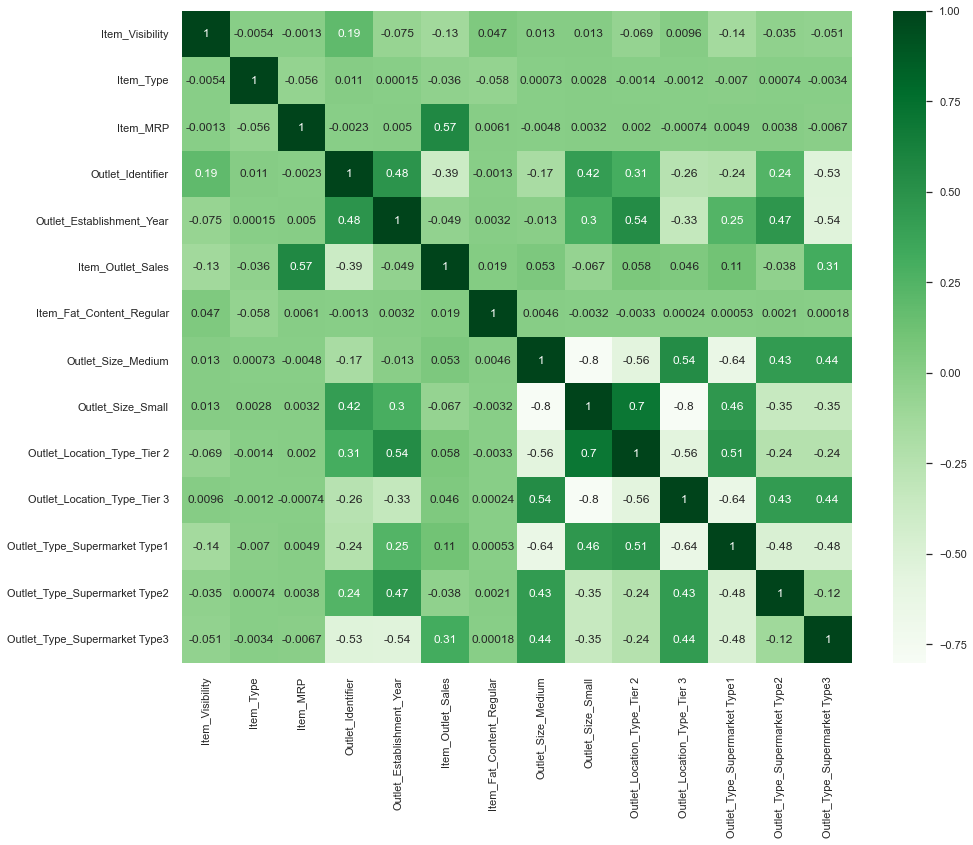

In [1614]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(ML_df.corr(), cmap = 'Greens', annot=True);

Most Relevant Features are:
1- Item_MRP
2- Outlet_Size

#### Running Model

##### Preparing Features & Target Vector

In [1615]:
#Checking Importance
model = LinearRegression()
y = ML_df['Item_Outlet_Sales']
X = ML_df.drop(columns=['Item_Outlet_Sales','Item_Identifier'])
model.fit(X,y)
importance = model.coef_

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: -0.58155
Feature: 1, Score: -291.83629
Feature: 2, Score: 0.97297
Feature: 3, Score: 15.56281
Feature: 4, Score: -80.07517
Feature: 5, Score: 66.37838
Feature: 6, Score: 52.23001
Feature: 7, Score: -1496.38034
Feature: 8, Score: -1381.48313
Feature: 9, Score: -239.46181
Feature: 10, Score: -846.50992
Feature: 11, Score: 611.09577
Feature: 12, Score: 739.96104
Feature: 13, Score: 3579.40081


In [1616]:
y = ML_df['Item_Outlet_Sales']
X = ML_df.drop(columns=['Item_Outlet_Sales','Item_Identifier','Item_Visibility','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Item_Fat_Content_Regular','Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3'])

##### Creating Train/Test Split

In [1617]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

##### Instantiating & Fitting Model

In [1618]:
reg = LinearRegression();
reg.fit(X_train,y_train);

##### Evaluate Result with *R^2*

In [1619]:
print(f"Train R^2 : {r2_score(y_train, reg.predict(X_train))}")
print(f"Test R^2 : {r2_score(y_test, reg.predict(X_test))}")

Train R^2 : 0.34770888493173213
Test R^2 : 0.3491066818668337


##### Evaluate Result with *RMSE*

In [1620]:
print(f"Train RMSE : {np.sqrt(mean_squared_error(y_train,reg.predict(X_train)))}")
print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test,reg.predict(X_test)))}")

Train RMSE : 1389.3979492934252
Test RMSE : 1340.0745805791994


## 5. Part 5

### a. Processing Data

Given the new learnings on OHE, Scaling as well as Different ML Algorithms, I am going to go back to the processing step and process the data using OHE and also scale any numerical data to check if
this has an impact on the algorithm scores

In [1621]:
#Fixing Item_Weight and Train Test Splitting the Data

df2['Item_Weight'] = pd.to_numeric(df2['Item_Weight'])

X = df2.drop(columns=['Item_Outlet_Sales'])
y = df2['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [1622]:
#Identifying Categroical Columns
X_train['Item_Fat_Content'].value_counts()

Low Fat    4129
Regular    2263
Name: Item_Fat_Content, dtype: int64

In [1623]:
X_train['Item_Type'].value_counts()

Fruits and Vegetables    948
Snack Foods              906
Household                695
Frozen Foods             632
Dairy                    507
Canned                   481
Baking Goods             478
Health and Hygiene       390
Soft Drinks              331
Meat                     302
Breads                   175
Hard Drinks              169
Others                   130
Starchy Foods            122
Breakfast                 84
Seafood                   42
Name: Item_Type, dtype: int64

In [1624]:
X_train['Item_Identifier'].value_counts()
X_train.shape

(6392, 11)

In [1625]:
# For Outlet Establishment Year & Outlet Size it's not yet clear to me what would be the best approach to processing them
#I am going to try first OHE all Categorical but not include Outlet Establishment Year first and treat it as numerical


ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

train_cat = X_train[['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']]
test_cat = X_test[['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']]

# train_cat = X_train.select_dtypes(include='object')
# test_cat = X_test.select_dtypes(include='object')

ohe.fit(train_cat)

train_cat_ohe = ohe.transform(train_cat)
test_cat_ohe = ohe.transform(test_cat)

cols = ohe.get_feature_names(train_cat.columns)

train_cat_ohe = pd.DataFrame(train_cat_ohe, columns=cols)
test_cat_ohe = pd.DataFrame(test_cat_ohe, columns=cols)


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [1626]:
#Handling numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_num = X_train.select_dtypes(include='number')
test_num = X_test.select_dtypes(include='number')

train_num.drop(columns=['Outlet_Establishment_Year'])
test_num.drop(columns=['Outlet_Establishment_Year'])

scaler.fit(train_num)

train_num_scaled = scaler.transform(train_num)
test_num_scaled = scaler.transform(test_num)

train_num_scaled = pd.DataFrame(train_num_scaled, columns=train_num.columns)
test_num_scaled = pd.DataFrame(test_num_scaled, columns=train_num.columns)


In [1627]:
X_train_processed = pd.concat([train_num_scaled, train_cat_ohe], axis = 1)
X_test_processed = pd.concat([test_num_scaled, test_cat_ohe], axis = 1)

X_train_processed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,0.84630,-0.71278,1.82811,1.32785,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,0.58599,-1.29105,0.60337,1.32785,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,-0.10029,1.81332,0.24454,0.13619,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
3,-1.13563,-1.00493,-0.95259,0.73202,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,1.55625,-0.96548,-0.33646,0.49369,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.79959,4.30966,-0.04466,0.01702,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6388,0.66882,1.00863,-1.05891,1.08952,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
6389,1.14211,-0.92053,1.52303,0.49369,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
6390,1.79289,-0.22776,-0.38378,1.08952,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000


### b. Preparing & Applying ML Models

In [1628]:
def model_eval(modelName, isLR, model, X_tr, X_te, y_tr, y_te):
    
    train_r2 = r2_score(y_tr, model.predict(X_tr))
    test_r2 = r2_score(y_te, model.predict(X_te))
    
    if(isLR):
        y_pred = model.predict(X_te)

        train_mae = mean_absolute_error(y_tr, model.predict(X_tr))
        train_mse = mean_squared_error(y_tr, model.predict(X_tr))
        train_rmse = np.sqrt(train_mse)

        test_mae = mean_absolute_error(y_te, y_pred)
        test_mse = mean_squared_error(y_te, y_pred)
        test_rmse = np.sqrt(test_mse)

        print(f'{modelName} Train Results: \n MAE: {train_mae} \n MSE: {train_mse} \n RMSE: {train_rmse} \n R^2 Score: {train_r2}\n')
        print(f'{modelName} Test Results: \n MAE: {test_mae} \n MSE: {test_mse} \n RMSE: {test_rmse} \n R^2 Score: {test_r2}')

    else:
        print(f'{modelName} Train Score : {model.score(X_tr, y_tr)}')
        print(f'{modelName} Test Score : {model.score(X_te, y_te)}')

### c. Baseline

In [1629]:
dummy = DummyRegressor(strategy='mean')

dummy.fit(X_train_processed, y_train)

model_eval('MeanDummyRegressor', True, dummy, X_train_processed, X_test_processed, y_train, y_test)


MeanDummyRegressor Train Results: 
 MAE: 1360.2184410159132 
 MSE: 2959455.7045265585 
 RMSE: 1720.306863477141 
 R^2 Score: 0.0

MeanDummyRegressor Test Results: 
 MAE: 1326.121044678208 
 MSE: 2772144.4627103633 
 RMSE: 1664.9758144520788 
 R^2 Score: -0.004772483978719766


#### d. Linear Regression

In [1630]:
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

model_eval('StdLinearRegression',True, lr, X_train_processed, X_test_processed, y_train, y_test)

StdLinearRegression Train Results: 
 MAE: 847.1939843554443 
 MSE: 1297576.8478973962 
 RMSE: 1139.1123069730202 
 R^2 Score: 0.5615488192937907

StdLinearRegression Test Results: 
 MAE: 804.1276955419991 
 MSE: 1194359.2200811098 
 RMSE: 1092.8674302407908 
 R^2 Score: 0.5671007422353203


#### e. Regression Tree

In [1631]:
regtree = DecisionTreeRegressor(random_state=42)

regtree.fit(X_train_processed, y_train)

model_eval('StdRegTree', False, regtree, X_train_processed, X_test_processed, y_train, y_test)

StdRegTree Train Score : 1.0
StdRegTree Test Score : 0.19340300551753464


#### f. Bagging Tree

In [1632]:
bagtree = BaggingRegressor(random_state=42)
bagtree.fit(X_train_processed, y_train)

model_eval('StdBaggingTree', False, bagtree, X_train_processed, X_test_processed, y_train, y_test)

StdBaggingTree Train Score : 0.9183709883017273
StdBaggingTree Test Score : 0.5246517919723945


#### g. Random Forest

In [1633]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)

model_eval('StfRandomForest', False, rf, X_train_processed, X_test_processed, y_train, y_test)

[estimator.get_depth() for estimator in rf.estimators_]

StfRandomForest Train Score : 0.938563428885927
StfRandomForest Test Score : 0.5581988711664457


[34,
 35,
 37,
 30,
 36,
 43,
 33,
 36,
 36,
 34,
 35,
 38,
 33,
 35,
 33,
 29,
 38,
 35,
 32,
 39,
 32,
 36,
 34,
 34,
 33,
 37,
 39,
 33,
 33,
 38,
 35,
 36,
 32,
 30,
 34,
 31,
 38,
 38,
 35,
 32,
 32,
 35,
 35,
 31,
 33,
 34,
 35,
 37,
 34,
 31,
 36,
 41,
 33,
 38,
 34,
 32,
 35,
 33,
 31,
 34,
 34,
 34,
 36,
 37,
 36,
 34,
 35,
 32,
 31,
 34,
 37,
 33,
 40,
 34,
 31,
 37,
 36,
 33,
 39,
 40,
 37,
 31,
 37,
 35,
 34,
 38,
 30,
 37,
 36,
 34,
 36,
 33,
 32,
 33,
 35,
 32,
 34,
 35,
 32,
 42]

In [1634]:
# tryin a mex-depth of 50
rf_50 = RandomForestRegressor(max_depth=50, random_state=42)
rf_50.fit(X_train_processed, y_train)

model_eval('RandomForest50MaxDepth', False, rf_50, X_train_processed, X_test_processed, y_train, y_test)

RandomForest50MaxDepth Train Score : 0.938563428885927
RandomForest50MaxDepth Test Score : 0.5581988711664457


## ScratchPad

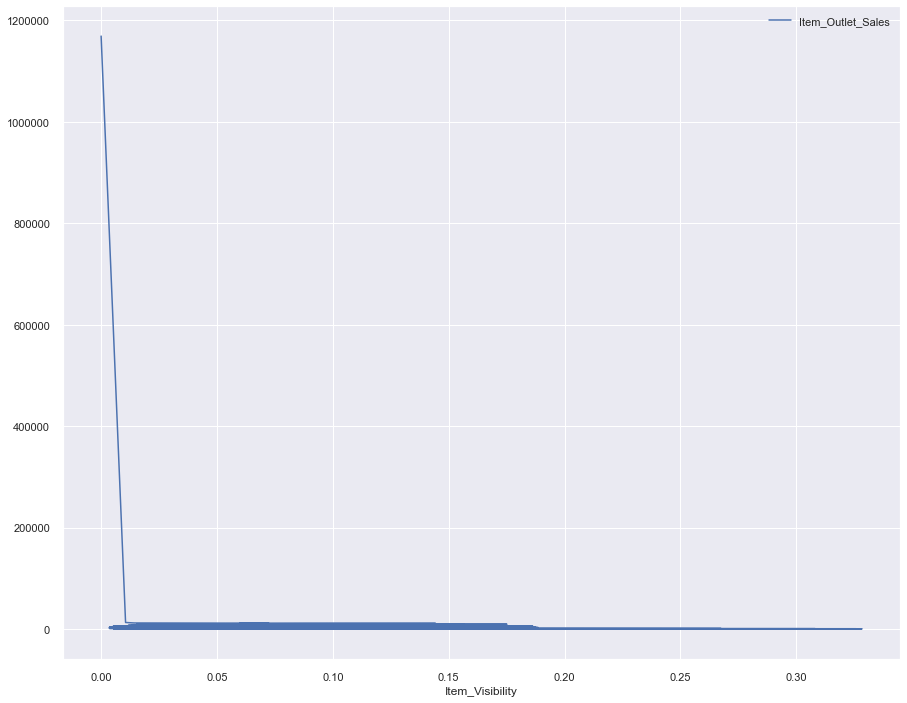

In [1635]:
itemSalesByVisibility = df[['Item_Outlet_Sales']].groupby([df['Item_Visibility']]).sum()
itemSalesByVisibility
#Item Total Sales by Visibility
itemSalesByVisibility.sort_values(by='Item_Outlet_Sales',inplace=True)
itemSalesByVisibility.plot()
plt.ticklabel_format(style='plain',axis='y')

In [1636]:
typeTotalItemSales = df['Item_Outlet_Sales'].groupby([df['Item_Type']]).sum().reset_index(name='Type_Total_Sales')
typeTotalItemSales
outletTotalSales = df['Item_Outlet_Sales'].groupby(df['Outlet_Identifier']).sum().reset_index(name='Outlet_Total_Sales')
outletTotalSales

,Outlet_Identifier,Outlet_Total_Sales
0,OUT010,188340.17240
1,OUT013,2142663.57820
2,OUT017,2167465.29400
3,OUT018,1851822.83000
4,OUT019,179694.09360
5,OUT027,3453926.05140
6,OUT035,2268122.93540
7,OUT045,2036725.47700
8,OUT046,2118395.16820
9,OUT049,2183969.81020


In [1637]:
visibilityTotalItemSales = df['Item_Outlet_Sales'].groupby([df['Item_Visibility']]).sum().reset_index(name='Visibility_Total_Sales')
visibilityTotalItemSales

,Item_Visibility,Visibility_Total_Sales
0,0.00000,1169057.58020
1,0.00357,3229.79580
2,0.00359,1691.79780
3,0.00360,2922.19620
4,0.00360,3075.99600
...,...,...
7875,0.30939,138.48640
7876,0.31109,154.46560
7877,0.32112,199.74000
7878,0.32578,761.00940


Text(0.5, 1.0, 'Total Sales by Outlet')

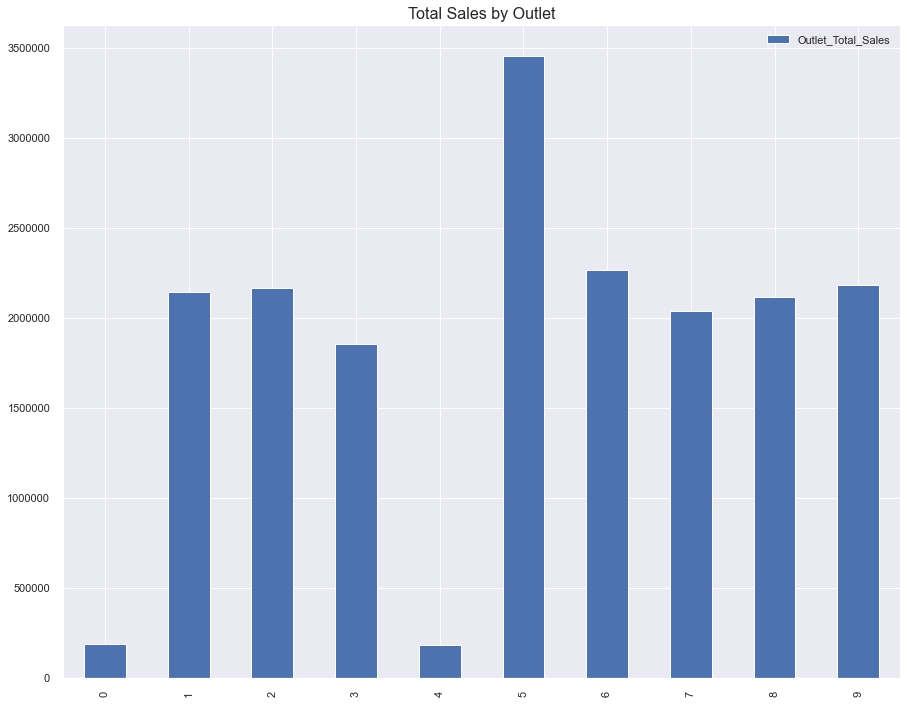

In [1638]:
#Item Total Sales by Outlet
outletTotalSales.plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Total Sales by Outlet',fontsize=16)

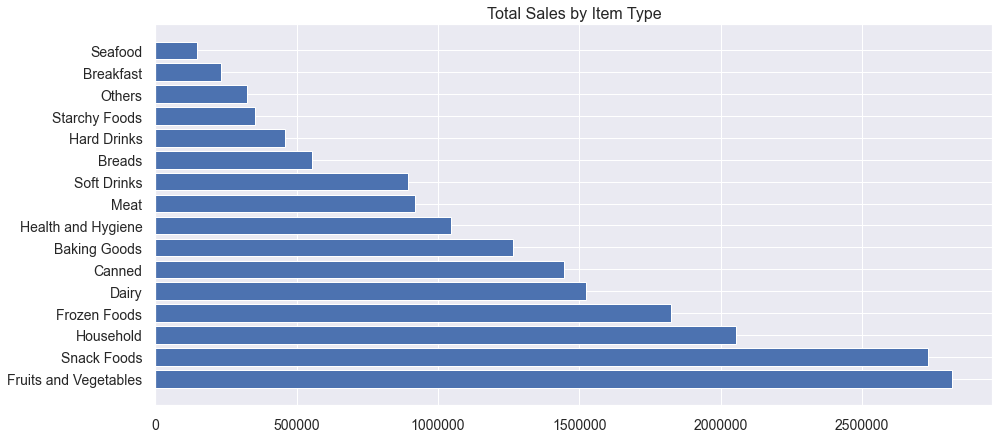

In [1639]:
# #totalSalesByType.plot(kind='bar')
plt.figure(figsize=(15,7))
plt.barh(totalSalesByType['Item_Type'],totalSalesByType['Item_Outlet_Sales'])
plt.ticklabel_format(style='plain',axis='x')
plt.title('Total Sales by Item Type',fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

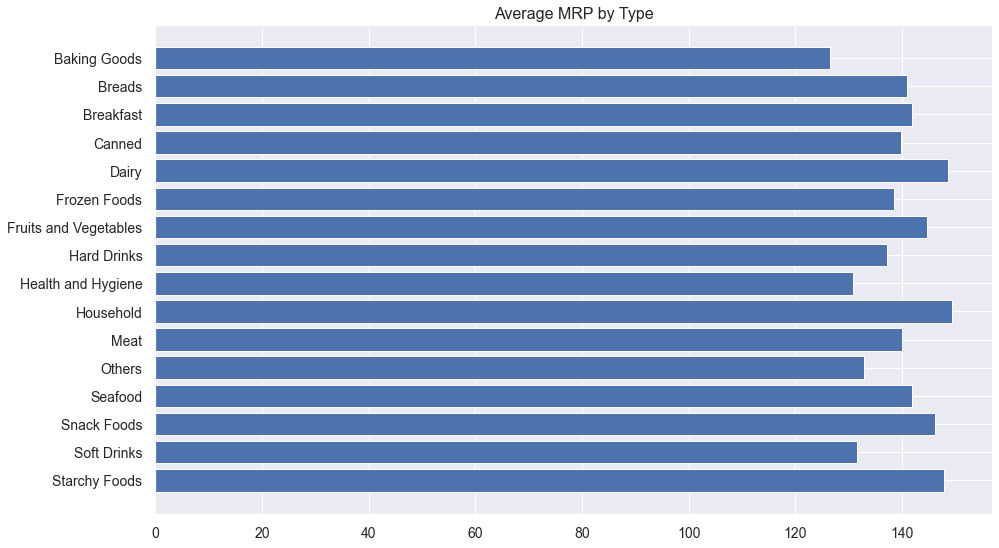

In [1640]:
plt.figure(figsize=(15,9))
plt.barh(avgMRPByType['Item_Type'],avgMRPByType['Avg_MRP']);
plt.title('Average MRP by Type',fontsize=16);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

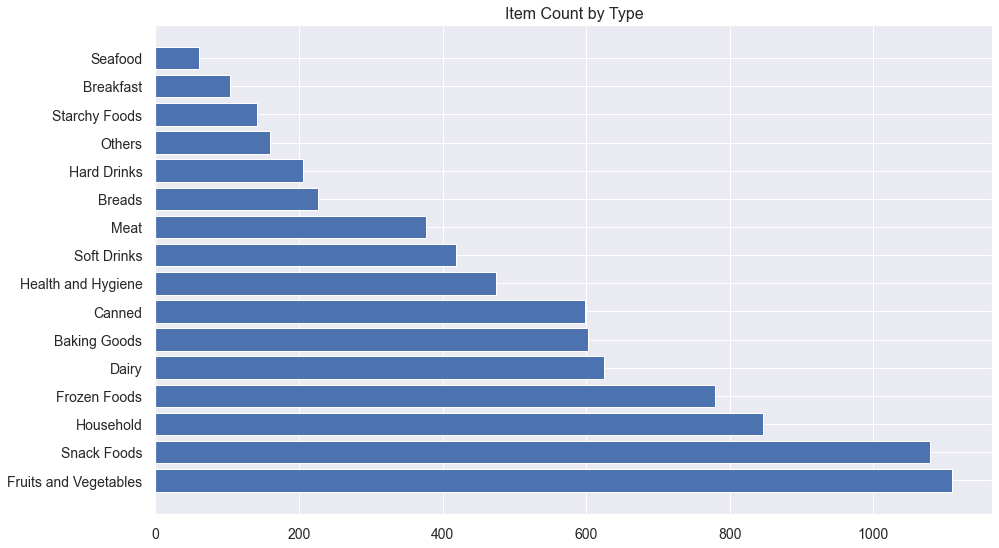

In [1641]:
countByType.sort_values(by='Item_Count',inplace=True,ascending=False)
plt.figure(figsize=(15,9))
plt.barh(countByType['Item_Type'],countByType['Item_Count']);
#plt.xticks(rotation=90);
plt.title('Item Count by Type',fontsize=16);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

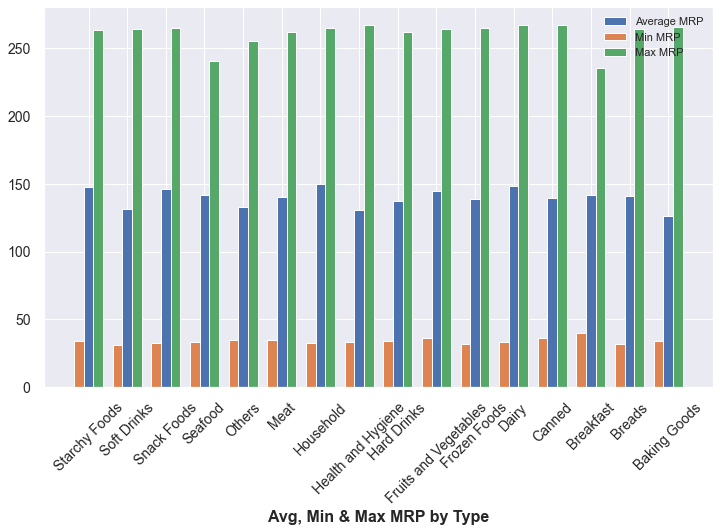

In [1642]:
plt.figure(figsize=(12,7))

barWidth = 0.25
maxMRPByType = df.groupby(df['Item_Type'])['Item_MRP'].max().reset_index(name='Max_MRP')
maxMRPByType.sort_values(by='Item_Type',inplace=True,ascending=False)
minMRPByType = df.groupby(df['Item_Type'])['Item_MRP'].min().reset_index(name='Min_MRP')
minMRPByType.sort_values(by='Item_Type',inplace=True,ascending=False)

r1 = np.arange(len(avgMRPByType))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r2, avgMRPByType['Avg_MRP'], width=barWidth, edgecolor = 'white', label = 'Average MRP');
plt.bar(r1, minMRPByType['Min_MRP'], width=barWidth, edgecolor = 'white', label = 'Min MRP');
plt.bar(r3, maxMRPByType['Max_MRP'], width=barWidth, edgecolor = 'white', label = 'Max MRP');

plt.xlabel('Avg, Min & Max MRP by Type', fontweight='bold',fontsize=16);
plt.xticks([r + barWidth for r in range(len(avgMRPByType))], avgMRPByType['Item_Type']);
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
#plt.ylabel('Count of Countries', fontweight='bold');

plt.legend();

#Source: https://www.python-graph-gallery.com/11-grouped-barplot